In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# devemos primeiramente ler o dataset e separar as amostras dos rotulos
df = pd.read_excel('data/Dry_Bean_Dataset.xlsx')
x = df.iloc[:, :-1] # tirar a última coluna
y = df.iloc[:, -1]  # somente última coluna (rotulos)

print(f'Rótulos originais: {y.unique()}')

# trocar rotulos em texto para números
label_to_int = LabelEncoder()
y_int = label_to_int.fit_transform(y)

# trocando os rotulos no dataframe
df.iloc[:, -1] = y_int
# print(df.head())

print(f'Rótulos em números: {y.unique()}')

Rótulos originais: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
Rótulos em números: [5 0 1 2 4 6 3]


In [7]:
# devemos separar o dataset em 2 conjuntos: treino, testes
# para isso utilizaremos a tecnica do sklearn para dividir os conjuntos de forma balanceada

# dividir primeiro entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y)

print(f'Número de amostras do dataset: {len(x)} (100%)')
print(f'Tamanho do conjunto de treino: {len(x_train)} ({round(len(x_train)*100/len(x),2)}%)')
print(f'Tamanho do conjunto de testes: {len(x_test)} ({round(len(x_test)*100/len(x),2)}%)')

# converter dados para formatos aceitos pelo algoritmo
x_train = x_train.to_numpy().astype(float)
x_test = x_test.to_numpy().astype(float)
y_train = y_train.to_numpy().astype(int)
y_test = y_test.to_numpy().astype(int)

Número de amostras do dataset: 13611 (100%)
Tamanho do conjunto de treino: 12249 (89.99%)
Tamanho do conjunto de testes: 1362 (10.01%)


In [8]:
# criar instancia da arvore de decisao
tree = DecisionTreeClassifier(criterion='gini',
                              # max_depth = 10,
                              # min_samples_split = 2),
                              # min_samples_leaf = 1
                                )

# treinar a arvore e fazer as previsoes
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

# print(type(y_test[1]))
# print(type(y_pred[1]))
# print(y_test[:20])
# print(y_pred[:20])

# obtendo metricas de avaliacao
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Test Acurracy: {accuracy}')
print(f'Test MSE: {mse}')

# dimensao da arvore
dimension = tree.tree_.node_count
print(f'Dimensão da árvore (nós): {dimension}')

# imprimindo as features com base na sua importancia
feature_names = x.columns
print("Importância de cada feature:")
feature_importance = np.array(list(zip(feature_names, tree.feature_importances_)))
indices = np.argsort(feature_importance[:, 1])[::-1] # ordem decrescente
sorted_features = feature_importance[indices]
for feature, importance in sorted_features:
    perc = round(float(importance)*100,2)
    print(f"\t{feature}: {perc}%")

Test Acurracy: 0.9118942731277533
Test MSE: 0.6908957415565345
Dimensão da árvore (nós): 1597
Importância de cada feature:
	ShapeFactor1: 23.45%
	ShapeFactor3: 21.36%
	MajorAxisLength: 18.03%
	Perimeter: 16.16%
	roundness: 6.79%
	ShapeFactor4: 3.24%
	Solidity: 2.1%
	MinorAxisLength: 2.07%
	Extent: 1.39%
	Area: 1.35%
	Compactness: 1.34%
	ShapeFactor2: 0.84%
	ConvexArea: 0.62%
	AspectRation: 0.55%
	Eccentricity: 0.38%
	EquivDiameter: 0.31%


In [9]:
# plotar a arvore de decisao formato 'pdf'
# foi necessario instalar o pacote tanto no python(pip install graphviz) quanto no linux(sudo apt install graphviz)
import graphviz
from sklearn.tree import export_graphviz

class_names = y.unique().astype('str')
tree_view = export_graphviz(tree, out_file=None, feature_names=feature_names, class_names=class_names,
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(tree_view)
graph.render("results/decision_tree")  # salvar a arvore em um arquivo
graph.view()                   # abrir a arvore em uma janela

'results/decision_tree.pdf'

Classes: [0 1 2 3 4 5 6]


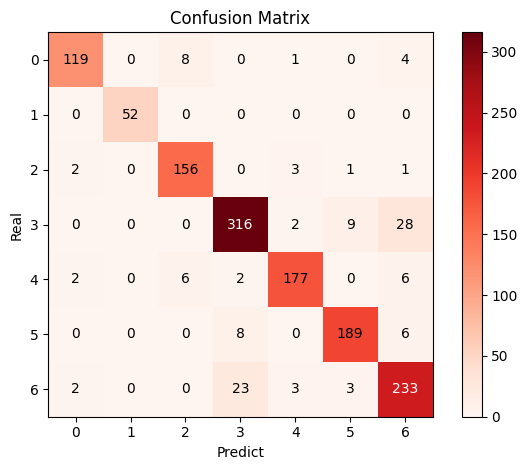

In [10]:
# matriz de confusao
cm = confusion_matrix(y_test, y_pred)

classes = np.unique(y_test)
print(f'Classes: {classes}')

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Adicionar valores aos quadrados da matriz de confusao
lim_color_black = 200  # mudar cor da letra para branco caso a cor do vermelho fique muito escura
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > lim_color_black else "black")

plt.ylabel('Real')
plt.xlabel('Predict')
plt.tight_layout()
plt.show()